In [2]:
cd ~/Umila/numila

/Users/fred/Umila/numila


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg'

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotting

import main
import utils

In [4]:
# We track the development of a select set of nodes.
track = [
    'i',
    'e',
    'o',
    'ke',
    'D@ts',
    '[o ke]',
    'DEn',
    'k^m',
    'hir',
    'an',
    '[k^m hir]',
    '[k^m an]',
    'gEt',
    'mi',
    'yu',
    'yuR',
    'dWn',
    'sterz',
    '[dwn sterz]',
    'tIG',
    '[i tIG]',
    'mI',
    'sIG',
    '[mI sIG]',
    'yE',
    'lo',
    '[yE lo]',
]

In [5]:
corpus = main.syl_corpus()
params = {'DECAY_RATE': .0001,
          'CHUNK_THRESHOLD': 0.2,}
model, history = main.train(corpus,
                       utterances=1000,
                       track=track,
                       sample_rate=100,
                       model_params=params,
                      )
graph = model.graph
print('num nodes: ', len(graph.nodes))

trained on 1000 utterances
train time : 7.914 seconds
num nodes:  1462


In [6]:
# Parse a few adult utterances.
for _ in range(10):
    print(model.parse_utterance(next(corpus)))

([# hY] | #)
([# no] | [[ma mi] Iz] | nat | [pI kIG] | yu | [^p #])
([# yu] | [h@v tu] | [it fRst] | DEn | [[ma mi] wIl] | pIk | yu | [^p #])
([[[# Der] [yu go]] #])
(# | [[ri x] li] | #)
(# | wW | #)
(# | [[x n^] DR] | bYt | #)
([[# yR] #])
(# | xm | mor | #)
([# Y] | se | D@ts | #)


In [12]:
# Attempt to recreate adult utterances given a bag of words.
for _ in range(10):
    utt = next(corpus)
    if len(utt) == 1:
        continue  # task is meaningless with a single word utterance
    print('\nADULT:', ' '.join(utt))
    try:
        model_utt = model.speak(utt)
        flat_utt = utils.flatten_parse(model_utt)
        print('MODEL:', model_utt)
        print('COMMON:', main.common_neighbor_metric(flat_utt, utt))
    except KeyError as e:
        print(e)


ADULT: y^ mi y^ mi CI kIn @nd nu dxlz
MODEL: [[[[CI kIn] @nd] [[y^ mi] [y^ mi]]] [nu dxlz]]
COMMON: 0.75

ADULT: me bi Der di hY dre tId px te toz
MODEL: [[[[px te] toz] [tId [me bi]]] [[di hY] [dre Der]]]
COMMON: 0.5555555555555556

ADULT:  Der di hY dre tId px te toz In Der
MODEL: [[[di tId] [dre ]] [[hY Der] [[In Der] [[px te] toz]]]]
COMMON: 0.3

ADULT: me bi D@ts w^t Doz TIGz ar
MODEL: [[TIGz [w^t ar]] [[me bi] [Doz D@ts]]]
COMMON: 0.16666666666666666

ADULT: d^ zxnt se nu dxlz i DR
MODEL: [[[d^ zxnt] [nu dxlz]] [se [i DR]]]
COMMON: 0.5

ADULT: Y J^st dont no w^t yur i tIG mor gIn
MODEL: [[[i tIG] [yur J^st]] [[no w^t] [[Y dont] [mor gIn]]]]
COMMON: 0.3333333333333333

ADULT: yu dont ker du yu
MODEL: [[yu dont] [ker [du yu]]]
COMMON: 1.0

ADULT: se Its y^ mi
MODEL: [Its [[y^ mi] se]]
COMMON: 0.6666666666666666

ADULT: Its y^ mi
MODEL: [Its [y^ mi]]
COMMON: 1.0

ADULT: xm y^m y^m y^m
MODEL: [xm [[y^m y^m] y^m]]
COMMON: 1.0


In [13]:
history.keys()

Int64Index([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], dtype='int64')

/Users/fred/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


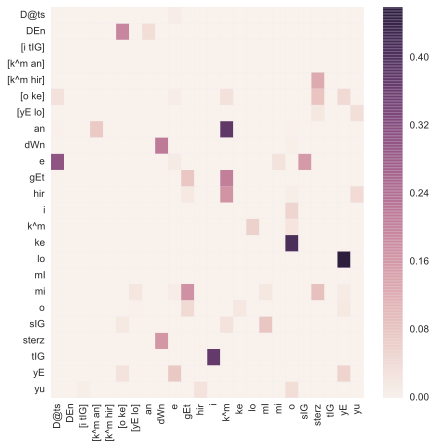

In [15]:
# The chunkability of a set of nodes. The first
# node in a pair is on the x axis.
plotting.heatmap(history[900], figsize=(7,7))

/Users/fred/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


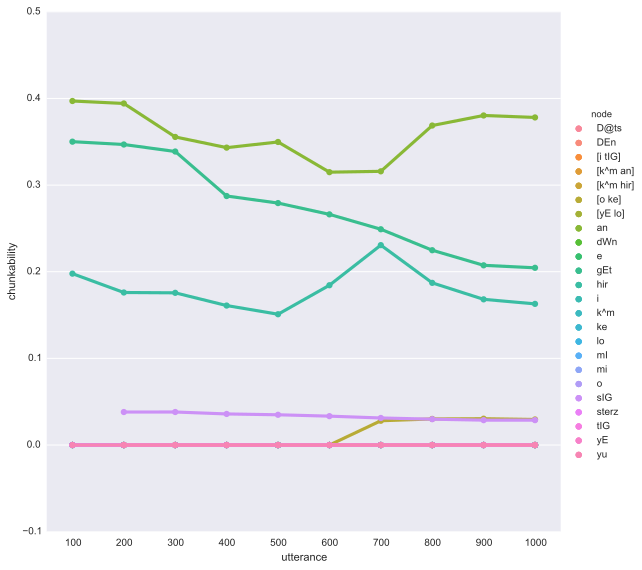

In [17]:
# Track the chunkability of nodes with /k^m/ ("come") over time.
mdf = main.node_frame(history, 'k^m', track)
sns.factorplot('utterance', 'chunkability', hue='node', data=mdf,
               markers='.', size=8,)

In [18]:
# See the relative contribution of each edge type.
# Note that these values are affected by the
# FTP_PREFERENCE parameter.
def weights(w1, w2):
    print(w1, w2)
    print('  FTP:', graph.edge_weight('ftp', graph[w1], graph[w2]))
    print('  BTP:', graph.edge_weight('btp', graph[w2], graph[w1]))

weights('yu', 'w^nt')
weights('k^m', 'an')
weights('k^m', 'hir')

yu w^nt
  FTP: 0.0635469617839
  BTP: 0.572230200476
k^m an
  FTP: 0.323796727605
  BTP: 0.441376245009
k^m hir
  FTP: 0.123672361238
  BTP: 0.214553633553
